In [1]:
%cd drive/MyDrive/MML/Kryptonite-N

/content/drive/MyDrive/MML/Kryptonite-N


In [2]:
import tempfile
import os
import numpy as np
import torch
from tqdm import tqdm
from torch import nn, optim
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2Model
import pandas as pd
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
import random
import tensorflow as tf

# Set the random seed for reproducibility
SEED = 42

# For Python's built-in random module
random.seed(SEED)

# For NumPy
np.random.seed(SEED)

# For TensorFlow/Keras
tf.random.set_seed(SEED)

In [ ]:
!pip install tensorflow

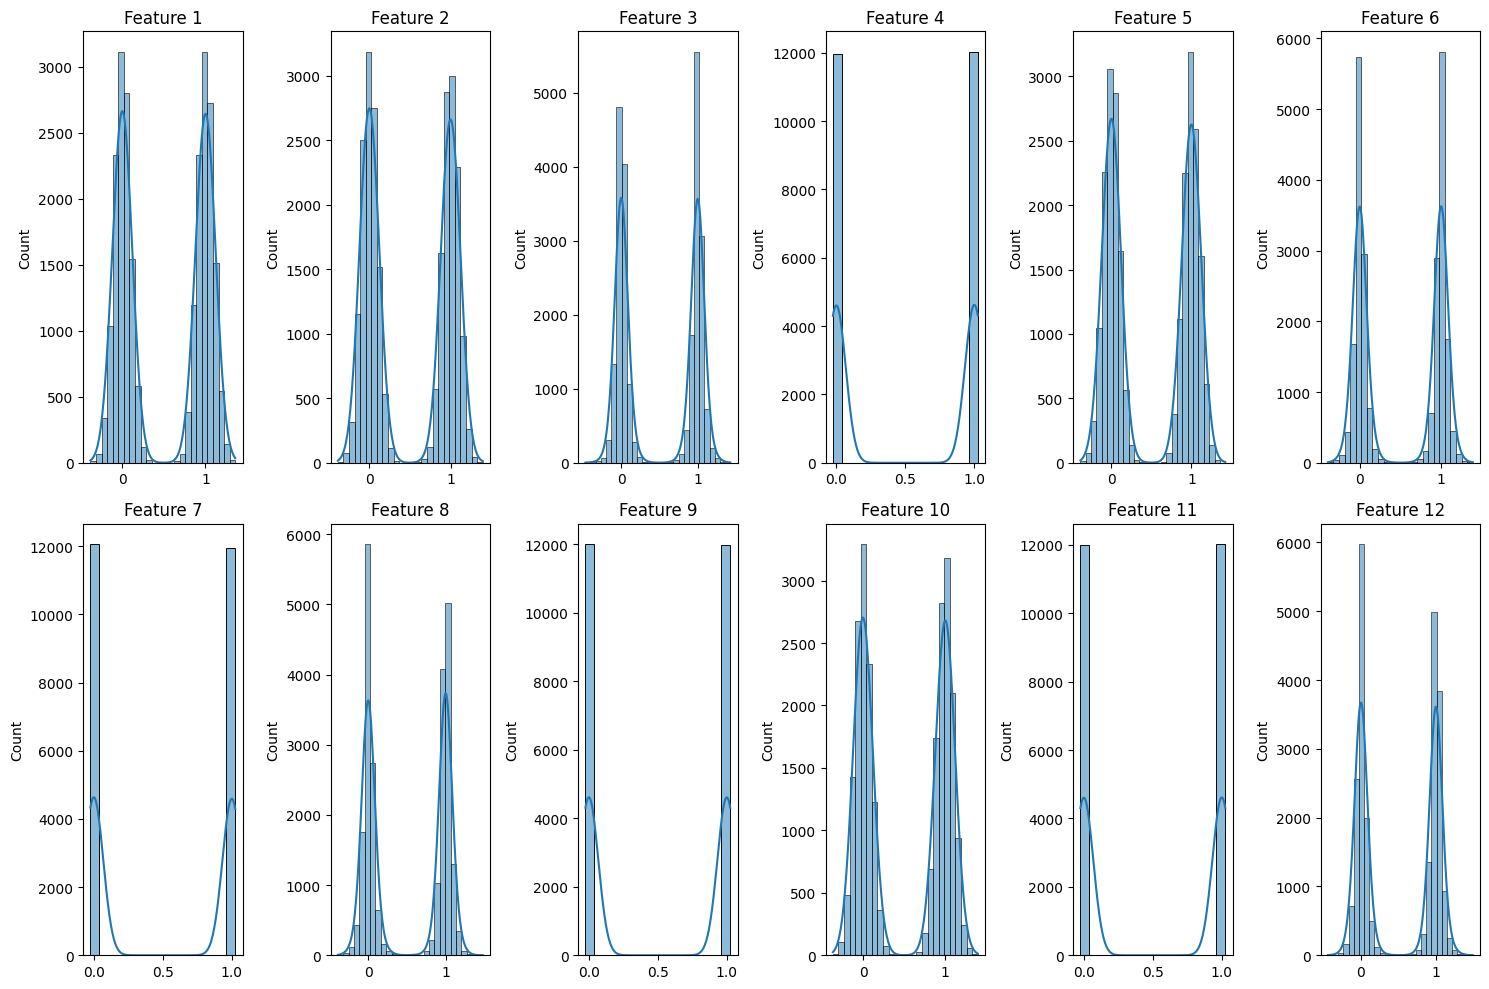

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each feature using histograms or KDE plots
X = np.load('Datasets/kryptonite-12-X.npy')

plt.figure(figsize=(15, 10))
for i in range(X.shape[1]):  # Loop over each feature
    plt.subplot(2, 6, i+1)  # 3 rows, 5 columns of subplots
    sns.histplot(X[:, i], kde=True)
    plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

y = np.load('Datasets/kryptonite-12-y.npy')
print(Counter(y))

Counter({1: 12191, 0: 11809})


In [ ]:
np.shape(X)

(24000, 12)

Decsiosn Tree with Adaboost

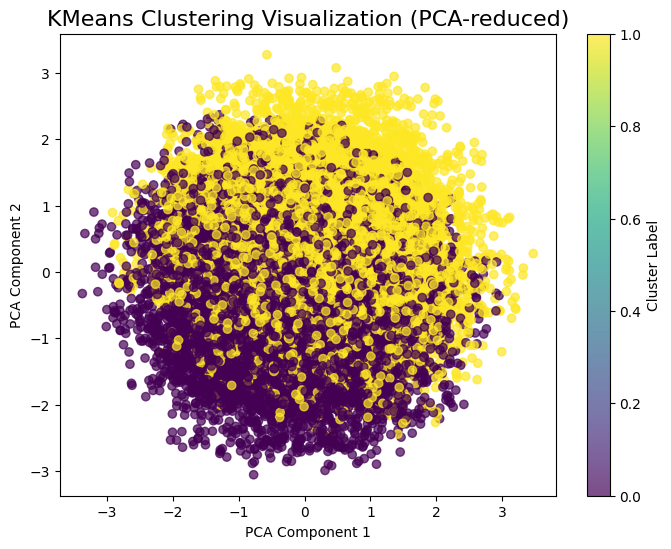

Clustering Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50     11809
           1       0.51      0.50      0.50     12191

    accuracy                           0.50     24000
   macro avg       0.50      0.50      0.50     24000
weighted avg       0.50      0.50      0.50     24000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Load your data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering to the data
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
X_clustered = kmeans.fit_predict(X_scaled)

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters in 2D (PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_clustered, cmap='viridis', marker='o', alpha=0.7)
plt.title('KMeans Clustering Visualization (PCA-reduced)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Optional: Print a classification report to evaluate the clustering (if true labels are available)
print("Clustering Classification Report:")
print(classification_report(y, X_clustered))







Extra Trees with Polynomial Feature Transform

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Step 1: Scale the features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate Polynomial Features
degree = 4  # Degree of the polynomial features (you can adjust this value)
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term (intercept)
X_poly = poly.fit_transform(X_scaled)  # Transform the original data to polynomial features

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the ExtraTrees model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the ExtraTrees model on the polynomial features
et_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model on the test set
y_pred = et_model.predict(X_test)

# Print classification report to evaluate performance
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Optional: You can print the accuracy score directly
from sklearn.metrics import accuracy_score
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))




Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2396
           1       0.96      0.96      0.96      2404

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

Accuracy on Test Set: 0.9625


Cross-Validation with Classification Report for Each Fold

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Step 1: Scale the features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate Polynomial Features
degree = 4  # Degree of the polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term (intercept)
X_poly = poly.fit_transform(X_scaled)  # Transform the original data to polynomial features

# Step 3: Initialize the ExtraTreesClassifier model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Step 4: Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Perform K-Fold Cross-Validation and print classification report for each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_poly), 1):
    print(f"Fold {fold}")

    # Split data into training and validation sets based on the current fold
    X_train, X_val = X_poly[train_index], X_poly[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the model on the training set
    et_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = et_model.predict(X_val)

    # Print the classification report for the current fold
    print(classification_report(y_val, y_val_pred))
    print("="*80)  # Separator for clarity between folds


Fold 1
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2396
           1       0.96      0.96      0.96      2404

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

Fold 2
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2341
           1       0.96      0.96      0.96      2459

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

Fold 3
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2350
           1       0.96      0.97      0.96      2450

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

Decision Trees with Polynomial Feature Transform

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Step 1: Scale the features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Generate Polynomial Features (degree=4)
degree = 4  # Degree of the polynomial features (you can adjust this value)
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term (intercept)
X_poly = poly.fit_transform(X_scaled)  # Transform the original data to polynomial features

# Step 3: Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForest model on the polynomial features
rf_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Print classification report to evaluate performance
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Optional: Print the accuracy score directly
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2396
           1       0.89      0.91      0.90      2404

    accuracy                           0.90      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.90      0.90      0.90      4800

Accuracy on Test Set: 0.8960416666666666


TensorFlow implementation without data leakage

In [ ]:
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the random seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Define neural network architecture
def create_model():
    model = Sequential([
        Dense(128, input_dim=X_train_full.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

print("Starting K-Fold Cross-Validation...\n")
# K-fold Cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_full), 1):
    print(f"Fold {fold}")

    # Split into training and validation data for the current fold
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Standardize the training and validation data separately
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Create and train the model
    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=64,
              validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate on validation data
    y_val_pred = (model.predict(X_val_scaled) > 0.5).astype('int32')

    # Print full classification report
    print(classification_report(y_val, y_val_pred))
    print("=" * 80)

# Evaluate on the separate test set
print("\nEvaluating on the Test Set...\n")

# Standardize the test set using a scaler fit only on the training data
scaler = StandardScaler()
X_train_scaled_full = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# Train a final model on the full training set
model = create_model()
model.fit(X_train_scaled_full, y_train_full, epochs=100, batch_size=64, verbose=0)

# Make predictions on the test set
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')

# Print final classification report on test set
print("Final Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Starting K-Fold Cross-Validation...

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1878
           1       0.96      0.95      0.95      1962

    accuracy                           0.95      3840
   macro avg       0.95      0.95      0.95      3840
weighted avg       0.95      0.95      0.95      3840

Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1853
           1       0.95      0.96      0.96      1987

    accuracy                           0.96      3840
   macro avg       0.96      0.96      0.96      3840
weighted avg       0.96      0.96      0.96      3840

Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1892
           1       0.96      0.96      0.96      1948

    accuracy                           0.96      3840
   macro avg       0.96      0.96      0.96      3840
weighted avg       0.96      0.96      0.96      3840

Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1873
           1       0.95      0.96      0.96      1967

    accuracy                           0.95      3840
   macro avg       0.96      0.95      0.95      3840
weighted avg       0.95      0.95      0.95      3840

Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1917
           1       0.95      0.96      0.96      1923

    accuracy                           0.96      3840
   macro avg       0.96      0.96      0.96      3840
weighted avg       0.96      0.96      0.96      3840


Evaluating on the Test Set...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2396
           1       0.94      0.95      0.94      2404

    accuracy                           0.94      4800
   macro avg       0.94      0.94      0.94      4800
weighted avg       0.94      0.94      0.94      4800



Without data leakage using *Pytorch*

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_full = torch.tensor(X_train_full, dtype=torch.float32)
y_train_full = torch.tensor(y_train_full, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, patience=10):
    best_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(100):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Validation phase (only if val_loader is provided)
        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val, y_val = X_val.to(device), y_val.to(device)
                    val_outputs = model(X_val).squeeze()
                    val_loss += criterion(val_outputs, y_val).item()

            val_loss /= len(val_loader)

            # Early stopping logic
            if val_loss < best_loss:
                best_loss = val_loss
                best_model_state = model.state_dict()
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    model.load_state_dict(best_model_state)
                    break
        else:
            # If no validation set, just save the model after the last epoch
            best_model_state = model.state_dict()

    model.load_state_dict(best_model_state)
    return model

print("Starting K-Fold Cross-Validation...\n")
input_dim = X_train_full.shape[1]

# K-fold Cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_full), 1):
    print(f"Fold {fold}")

    # Split into training and validation sets
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Standardize the training and validation data separately
    scaler = StandardScaler()
    X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
    X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

    # Create DataLoaders
    train_dataset = TensorDataset(X_train_scaled, y_train)
    val_dataset = TensorDataset(X_val_scaled, y_val)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64)

    # Initialize model, criterion, and optimizer
    model = NeuralNet(input_dim).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model with early stopping
    model = train_model(model, train_loader, val_loader, criterion, optimizer)

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_scaled.to(device)).cpu().squeeze()
        y_val_pred = (val_outputs > 0.5).int()
        print(classification_report(y_val, y_val_pred))
        print("=" * 80)

# Evaluate on the separate test set
print("\nEvaluating on the Test Set...\n")
scaler = StandardScaler()
X_train_scaled_full = torch.tensor(scaler.fit_transform(X_train_full), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

# Train a final model on the full training set
# Train a final model on the full training set without validation
model = NeuralNet(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_dataset_full = TensorDataset(X_train_scaled_full, y_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=64, shuffle=True)

model = train_model(model, train_loader_full, None, criterion, optimizer)


# Make predictions on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_scaled.to(device)).cpu().squeeze()
    y_test_pred = (test_outputs > 0.5).int()

# Print final classification report
print("Final Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Starting K-Fold Cross-Validation...

Fold 1
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1878
         1.0       0.95      0.96      0.96      1962

    accuracy                           0.95      3840
   macro avg       0.95      0.95      0.95      3840
weighted avg       0.95      0.95      0.95      3840

Fold 2
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1853
         1.0       0.96      0.96      0.96      1987

    accuracy                           0.96      3840
   macro avg       0.96      0.96      0.96      3840
weighted avg       0.96      0.96      0.96      3840

Fold 3
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1892
         1.0       0.96      0.95      0.95      1948

    accuracy                           0.95      3840
   macro avg       0.95      0.95      0.95      3840
weighted avg    

Without Data Leakage implementation - Extra Trees

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Load data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Step 1: Initialize the ExtraTreesClassifier model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=123)

# Step 2: Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Perform K-Fold Cross-Validation and print classification report for each fold
degree = 4  # Degree of the polynomial features
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}")

    # Split data into training and validation sets based on the current fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit the scaler only on the training set and transform both sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)

    # Train the model on the training set
    et_model.fit(X_train_poly, y_train)

    # Make predictions on the validation set
    y_val_pred = et_model.predict(X_val_poly)

    # Print the classification report for the current fold
    print(classification_report(y_val, y_val_pred))
    print("="*80)  # Separator for clarity between folds

Fold 1
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2396
           1       0.96      0.96      0.96      2404

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

Fold 2
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2341
           1       0.96      0.96      0.96      2459

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

Fold 3
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2350
           1       0.96      0.97      0.96      2450

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

Assessing Stability, Robustness Checks

Running cross-validation for stability check...
Random Seed 42: Mean Accuracy = 0.9606, Std = 0.0016
Random Seed 99: Mean Accuracy = 0.9602, Std = 0.0002
Random Seed 123: Mean Accuracy = 0.9607, Std = 0.0034


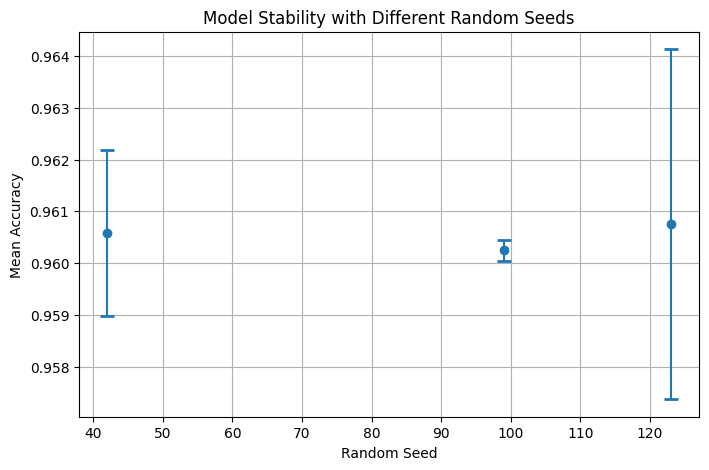

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def run_cross_validation(X, y, degree=4, n_splits=5, seeds=[42, 99, 123]):
    """
    Perform cross-validation with fixed hyperparameters to check model stability across different seeds.
    """
    mean_accuracies = []
    std_accuracies = []

    for seed in seeds:
        accuracies = []
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

        for train_index, val_index in kf.split(X):
            # Split data into training and validation sets
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Preprocessing: scaling and polynomial feature transformation
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)

            poly = PolynomialFeatures(degree=degree, include_bias=False)
            X_train_poly = poly.fit_transform(X_train_scaled)
            X_val_poly = poly.transform(X_val_scaled)

            # Model training with fixed hyperparameters
            et_model = ExtraTreesClassifier(n_estimators=50, random_state=42)
            et_model.fit(X_train_poly, y_train)

            # Evaluate on validation set
            y_val_pred = et_model.predict(X_val_poly)
            acc = accuracy_score(y_val, y_val_pred)
            accuracies.append(acc)

        # Calculate mean and standard deviation of accuracies for the current seed
        mean_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        mean_accuracies.append(mean_acc)
        std_accuracies.append(std_acc)

        print(f"Random Seed {seed}: Mean Accuracy = {mean_acc:.4f}, Std = {std_acc:.4f}")

    # Plotting error bars
    plt.figure(figsize=(8, 5))
    plt.errorbar(seeds, mean_accuracies, yerr=std_accuracies, fmt='o', capsize=5, capthick=2)
    plt.xlabel("Random Seed")
    plt.ylabel("Mean Accuracy")
    plt.title("Model Stability with Different Random Seeds")
    plt.grid(True)
    plt.show()

    return mean_accuracies, std_accuracies

# Load data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Run cross-validation and robustness check
print("Running cross-validation for stability check...")
mean_accuracies, std_accuracies = run_cross_validation(X, y)

